# Import Libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import csv
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import pickle
from PIL import ImageOps, Image
import tensorflow as tf
import matplotlib.pyplot as plt
# import tensorflowjs as tfjs

from tqdm import tqdm
from tensorflow.data import AUTOTUNE
from collections import Counter
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

2022-04-13 17:18:57.759183: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-04-13 17:18:58.806292: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


True

2022-04-13 17:18:58.807580: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-04-13 17:18:58.838553: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 17:18:58.839055: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:09:00.0 name: GeForce RTX 2080 SUPER computeCapability: 7.5
coreClock: 1.845GHz coreCount: 48 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 462.00GiB/s
2022-04-13 17:18:58.839068: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-04-13 17:18:58.840408: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-04-13 17:18:58.840433: I tensorflow/stream_executor/plat

In [3]:
ROUND = 6
EXERCISE = 'pushup'
CUR_CLASS = 'up'
PREV_CLASS = 'down'
SUBFIX_VID_NAME = '_hard_vote'
REMOTE = True

# Load all file paths

In [4]:
all_file_paths = []
accepted_exts = ('.jpg', '.jpeg','.png')
if REMOTE:
    walk_path = f'/home/u6188041/jom/Dataset/EzFit_dataset/images/{EXERCISE}'
else:
    walk_path = f'D:\EzFit_dataset\images\len_{SEQ_LEN}\{EXERCISE}'
for path, subdirs, files in os.walk(walk_path):
    for name in files:
        if name.lower().endswith(accepted_exts):
            all_file_paths.append(os.path.join(path, name))

In [5]:
all_file_paths

['/home/u6188041/jom/Dataset/EzFit_dataset/images/pushup/pushup-down/13_2_1.jpg',
 '/home/u6188041/jom/Dataset/EzFit_dataset/images/pushup/pushup-down/72_5_1.jpg',
 '/home/u6188041/jom/Dataset/EzFit_dataset/images/pushup/pushup-down/70_3_1.jpg',
 '/home/u6188041/jom/Dataset/EzFit_dataset/images/pushup/pushup-down/64_5_1.jpg',
 '/home/u6188041/jom/Dataset/EzFit_dataset/images/pushup/pushup-down/87_1_1.jpg',
 '/home/u6188041/jom/Dataset/EzFit_dataset/images/pushup/pushup-down/51_4_2.jpg',
 '/home/u6188041/jom/Dataset/EzFit_dataset/images/pushup/pushup-down/20_12_1.jpg',
 '/home/u6188041/jom/Dataset/EzFit_dataset/images/pushup/pushup-down/20_4_1.jpg',
 '/home/u6188041/jom/Dataset/EzFit_dataset/images/pushup/pushup-down/19_11_2.jpg',
 '/home/u6188041/jom/Dataset/EzFit_dataset/images/pushup/pushup-down/48_2_2.jpg',
 '/home/u6188041/jom/Dataset/EzFit_dataset/images/pushup/pushup-down/3_5_2.jpg',
 '/home/u6188041/jom/Dataset/EzFit_dataset/images/pushup/pushup-down/54_10_2.jpg',
 '/home/u61880

In [6]:
len(all_file_paths)

1307

In [7]:
# use for checking balance and stratify
labels = list(map(lambda x: x.split(os.path.sep)[-2], all_file_paths))
labels

['pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup-down',
 'pushup

In [8]:
# check balanceness
total = len(labels)
label_count = Counter(labels)
label_count, total

(Counter({'pushup-down': 434, 'pushup-up': 438, 'others': 435}), 1307)

# Preprocess

In [9]:
# fit to get all classes and we can use it in preprocess function in the data pipeline
le = LabelEncoder()
le.fit(labels)
le.classes_

array(['others', 'pushup-down', 'pushup-up'], dtype='<U11')

In [10]:
# train/test split from all paths
train_paths, test_paths = train_test_split(all_file_paths, test_size=0.1, random_state=42, stratify=labels)
len(train_paths), len(test_paths)

(1176, 131)

In [11]:
# verify stratify
Counter(list(map(lambda x: x.split(os.path.sep)[-2], test_paths)))

Counter({'others': 44, 'pushup-up': 44, 'pushup-down': 43})

# Class weighting
Since we have a bit imbalanced data, so we should do class weighting  
formula derived from here: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#calculate_class_weights

In [12]:
NUM_CLASSES = len(le.classes_)
class_weights = {}
for label in label_count:
    class_weights[le.transform([label])[0]] = (1 / label_count[label]) * (total / NUM_CLASSES)

In [13]:
class_weights

{1: 1.0038402457757296, 2: 0.9946727549467276, 0: 1.0015325670498085}

# Build data pipeline

In [14]:
EPOCHS = 150
BATCH_SIZE = 32
NUM_CLASSES = len(le.classes_)
INIT_LR = 1e-3

In [15]:
def load_data(image_path):
    # load data
    image = tf.io.read_file(image_path)
    image = tf.io.decode_png(image, channels=3)
    image = tf.image.resize(image, (120, 120)) / 255.0
    
    # parse label
    label = tf.strings.split(image_path, os.path.sep)[-2]
    one_hot = label == le.classes_
    one_hot = tf.cast(one_hot, tf.int32)
    return image, one_hot

In [16]:
train_ds = tf.data.Dataset.from_tensor_slices(train_paths)
train_ds = (train_ds
            .shuffle(len(train_paths), seed=42)
            .map(load_data, num_parallel_calls=AUTOTUNE)
            .cache()
            .batch(BATCH_SIZE)
            .prefetch(AUTOTUNE)
           )

2022-04-13 17:19:00.052092: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 17:19:00.052758: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:09:00.0 name: GeForce RTX 2080 SUPER computeCapability: 7.5
coreClock: 1.845GHz coreCount: 48 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 462.00GiB/s
2022-04-13 17:19:00.052838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 17:19:00.053474: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 17:19:00.054047: I tensorflow/core/common

In [17]:
test_ds = tf.data.Dataset.from_tensor_slices(test_paths)
test_ds = (test_ds
            .map(load_data, num_parallel_calls=AUTOTUNE)
            .cache()
            .batch(BATCH_SIZE)
            .prefetch(AUTOTUNE)
           )

In [18]:
next(iter(train_ds))

2022-04-13 17:19:00.525489: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-13 17:19:00.546385: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3499880000 Hz
2022-04-13 17:19:00.584105: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(<tf.Tensor: shape=(32, 120, 120, 3), dtype=float32, numpy=
 array([[[[0.62352943, 0.62352943, 0.6156863 ],
          [0.6243137 , 0.6243137 , 0.6243137 ],
          [0.63529414, 0.63529414, 0.6431373 ],
          ...,
          [0.5294118 , 0.5254902 , 0.5176471 ],
          [0.5337256 , 0.52980405, 0.5219609 ],
          [0.52954245, 0.5256209 , 0.51777774]],
 
         [[0.6392157 , 0.6392157 , 0.6313726 ],
          [0.63960785, 0.63960785, 0.63960785],
          [0.64379084, 0.64379084, 0.651634  ],
          ...,
          [0.5294118 , 0.5254902 , 0.5176471 ],
          [0.5294118 , 0.5254902 , 0.5176471 ],
          [0.5294118 , 0.5254902 , 0.5176471 ]],
 
         [[0.64705884, 0.64705884, 0.6392157 ],
          [0.647451  , 0.647451  , 0.647451  ],
          [0.654902  , 0.654902  , 0.6627451 ],
          ...,
          [0.5300654 , 0.533987  , 0.51437914],
          [0.5294118 , 0.53333336, 0.5137255 ],
          [0.53320265, 0.5371242 , 0.5175164 ]],
 
         ...,
 
      

## Train model

### tf model

In [19]:
# tf.keras.backend.clear_session()

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [21]:
# change to CNN
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(120,120,3), dtype=tf.dtypes.float32),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        1

In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# optimizer = tf.keras.optimizers.Adam(learning_rate=INIT_LR)

In [24]:
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer._decayed_lr(tf.float32)
    return lr
lr_metric = get_lr_metric(optimizer)

In [25]:
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', lr_metric])
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(train_ds,
          validation_data=test_ds,
          epochs=EPOCHS, 
          callbacks=[early_stopping],
          class_weight=class_weights)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/150


2022-04-13 17:19:03.740037: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-04-13 17:19:04.121123: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8202
2022-04-13 17:19:04.415878: W tensorflow/stream_executor/gpu/asm_compiler.cc:99] *** WARNING *** You are using ptxas 9.1.108, which is older than 9.2.88. ptxas 9.x before 9.2.88 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You do not need to update to CUDA 9.2.88; cherry-picking the ptxas binary is sufficient.
2022-04-13 17:19:04.417490: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 7.5
2022-04-13 17:19:04.417519: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2022-04-13 17:19:04.417616: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Fallin

37/37 [==============================] - 2s 23ms/step - loss: 1.0485 - accuracy: 0.4685 - val_loss: 0.9414 - val_accuracy: 0.6260
Epoch 2/150
37/37 [==============================] - 0s 11ms/step - loss: 0.8357 - accuracy: 0.6446 - val_loss: 0.6879 - val_accuracy: 0.7176
Epoch 3/150
37/37 [==============================] - 0s 10ms/step - loss: 0.6596 - accuracy: 0.7304 - val_loss: 0.6012 - val_accuracy: 0.7481
Epoch 4/150
37/37 [==============================] - 0s 10ms/step - loss: 0.5211 - accuracy: 0.8070 - val_loss: 0.7660 - val_accuracy: 0.7405
Epoch 5/150
37/37 [==============================] - 0s 11ms/step - loss: 0.3913 - accuracy: 0.8597 - val_loss: 0.9740 - val_accuracy: 0.7328
Epoch 6/150
37/37 [==============================] - 0s 10ms/step - loss: 0.3223 - accuracy: 0.8861 - val_loss: 0.6030 - val_accuracy: 0.8092
Epoch 7/150
37/37 [==============================] - 0s 10ms/step - loss: 0.2776 - accuracy: 0.9014 - val_loss: 0.4208 - val_accuracy: 0.8550
Epoch 8/150
37/37 

# Setup all dirs
*Note:* You have to create visualization dir at the bottom most manually

In [27]:
import os

In [28]:
all_dirs = []
model_dir = f'saved_models/round_{ROUND}/{EXERCISE}/'
all_dirs.append(model_dir)
pickle_dir = f'saved_pickles/round_{ROUND}/{EXERCISE}/'
all_dirs.append(pickle_dir)
output_vid_dir = f'output_videos/round_{ROUND}/{EXERCISE}/'
all_dirs.append(output_vid_dir)

In [29]:
for d in all_dirs:
    if not os.path.exists(d):
        os.makedirs(d, exist_ok=True)

# Save model

In [30]:
model.save(os.path.join(model_dir, f'{EXERCISE}_image_single.h5'), save_format='h5')

In [31]:
# serialize lb
with open(os.path.join(pickle_dir, f'{EXERCISE}_image_single_le.pickle'), 'wb') as file:
    pickle.dump(le, file)

# Evaluate the model

In [32]:
raw_preds_y = model.predict(test_ds)
preds_y = np.argmax(raw_preds_y, axis=1)
preds_y

array([2, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 2, 1, 2, 0, 1, 1])

In [33]:
# get y label back from tf.data
raw_test_y = np.concatenate([y for x, y in test_ds], axis=0)
test_y = np.argmax(raw_test_y, axis=1)
test_y

array([2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 2, 0, 1, 0])

In [34]:
test_y_text = le.inverse_transform(test_y)
preds_y_text = le.inverse_transform(preds_y)

### Accuracy

In [35]:
_, acc = model.evaluate(test_ds)
print('Test accuracy:', acc)

3/3 [==============================] - 0s 4ms/step - loss: 0.8538 - accuracy: 0.6842
Test accuracy: 0.6842105388641357


### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [37]:
cm = confusion_matrix(test_y_text, preds_y_text, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.classes_)

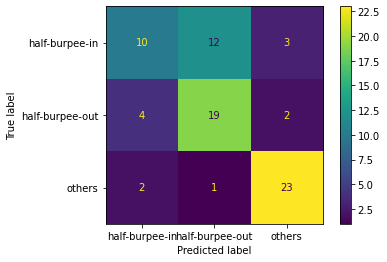

In [38]:
disp.plot()
plt.savefig(f'saved_artifacts/conf_matrix/final/{EXERCISE}/image_single_cm.png', dpi=300)
plt.show()

### ROC AUC

In [39]:
from sklearn.metrics import roc_auc_score

In [40]:
roc_auc_score(raw_test_y, raw_preds_y)

0.8612569130216189

# Make detection with model

In [41]:
loaded_model = tf.keras.models.load_model(os.path.join(model_dir, f'{EXERCISE}_image_single.h5'), custom_objects={'lr': lr_metric})

In [42]:
loaded_model.inputs

[<KerasTensor: shape=(None, 120, 120, 3) dtype=float32 (created by layer 'input_1')>]

In [43]:
loaded_model.outputs

[<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_1')>]

In [44]:
# tfjs.converters.save_keras_model(loaded_model, 'models/tfjs_models/RepCount_Pushup')

In [45]:
# serialize model and le
with open(os.path.join(pickle_dir, f'{EXERCISE}_image_single_le.pickle'), 'rb') as file:
    loaded_le = pickle.load(file)

In [46]:
from collections import deque, Counter

In [47]:
# SEQ_LEN = 8
NUM_TEST_VIDS = 3
for i in range(1,1+NUM_TEST_VIDS):
    rep_count = 0
    preds_window = deque(maxlen=15)
    current_stage = None
    previous_stage = None
    cap = cv2.VideoCapture(f'objective_test_videos/{EXERCISE}/{EXERCISE}_{i}.mp4')
    # video_width = int(cap.get(3))
    # video_height = int(cap.get(4))
    # video_size = (video_width, video_height)
    video_size = (640, 360)
    video_writer = cv2.VideoWriter(os.path.join(output_vid_dir, f'{EXERCISE}_{i}_image_single{SUBFIX_VID_NAME}.avi'), cv2.VideoWriter_fourcc(*'MJPG'),
                                   25, video_size)

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
            
        image = cv2.resize(frame, (640, 360))
        image_input = cv2.resize(frame, (120, 120)) / 255.0

        y_hat = loaded_model.predict(tf.expand_dims(image_input, axis=0))[0]
        y_idx = np.argmax(y_hat)
        
        if 'hard_vote' in SUBFIX_VID_NAME:
            # do hard voting
            preds_window.append(y_idx)
            pred_count = Counter(preds_window)
            # most_common return .items() format
            # ex. [(0,5), (1,3)]
            voted_pred = pred_count.most_common(1)[0][0]
            class_name = loaded_le.classes_[voted_pred]
        else:
            class_name = loaded_le.classes_[y_idx]
        
        prob = np.max(y_hat)
        print(y_hat, class_name, prob, end='\r')

        # count the rep logic
        current_stage = class_name

        if current_stage == f'{EXERCISE}-{CUR_CLASS}' and previous_stage == f'{EXERCISE}-{PREV_CLASS}':
            rep_count += 1

        previous_stage = current_stage

        print('rep:',rep_count, end='\r')

    #             image = cv2.resize(image, (640, 368))

        # status box at top left corner
        cv2.rectangle(image, (0,0), (320,60), (245,117,16), -1)

        # display class
        cv2.putText(image, 'Class', (95, 12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, class_name, (95, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

        # display prob
        cv2.putText(image, 'Prob', (15, 12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(round(np.max(prob),2)), (10, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

        # rep count box at top right corner
        cv2.rectangle(image, (580, 60), (640, 0), (245,117,16), -1)

        # display rep count
        cv2.putText(image, 'Rep', (640-52, 0+15),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(rep_count), (640-52, 0+50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.25, (255,255,255), 2, cv2.LINE_AA)

        video_writer.write(image)
        if not REMOTE:
            cv2.imshow(f'{EXERCISE} Count Detection', image)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    cap.release()
    video_writer.release()
    if not REMOTE:
        cv2.destroyAllWindows()

# Save class for visualization

In [48]:
NUM_TEST_VIDS = 3
for i in range(1, 1+NUM_TEST_VIDS):
    predicted_class = []
    preds_window = deque(maxlen=15)
    cap = cv2.VideoCapture(f'objective_test_videos/{EXERCISE}/{EXERCISE}_{i}.mp4')
    total_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    video_size = (640, 360)
    
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break

        image = cv2.resize(frame, (640, 360))
        image_input = cv2.resize(frame, (120, 120)) / 255.0

        y_hat = loaded_model.predict(tf.expand_dims(image_input, axis=0))[0]
        y_idx = np.argmax(y_hat)
        
        if 'hard_vote' in SUBFIX_VID_NAME:
            # do hard voting
            preds_window.append(y_idx)
            pred_count = Counter(preds_window)
            # most_common return .items() format
            # ex. [(0,5), (1,3)]
            voted_pred = pred_count.most_common(1)[0][0]
            class_name = loaded_le.classes_[voted_pred]
            predicted_class.append(voted_pred)
        else:
            class_name = loaded_le.classes_[y_idx]
            predicted_class.append(y_idx)
        
        prob = np.max(y_hat)
        print(y_hat, class_name, prob, end='\r')

        # status box at top left corner
        cv2.rectangle(image, (0,0), (320,60), (245,117,16), -1)

        # display class
        cv2.putText(image, 'Class', (95, 12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, class_name, (95, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

        # display prob
        cv2.putText(image, 'Prob', (15, 12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(round(np.max(prob),2)), (10, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

        # rep count box at top right corner
        cv2.rectangle(image, (580, 60), (640, 0), (245,117,16), -1)
        
        if not REMOTE:
            cv2.imshow(f'{EXERCISE} Count Detection', image)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    assert len(predicted_class) == total_frame, f"# of label {len(predicted_class)} != # of frames in the video {total_frame}"
            
    temp_save_path = f'saved_pickles/for_visualization/{EXERCISE}/test_vid_{i}/round_{ROUND}'
    if not os.path.exists(temp_save_path):
        os.makedirs(temp_save_path, exist_ok=True)
    with open(os.path.join(temp_save_path, f'test_vid_{i}_image_single{SUBFIX_VID_NAME}.pickle'), 'wb') as f:
        pickle.dump(predicted_class, f)
    cap.release()
    if not REMOTE:
        cv2.destroyAllWindows()